In [134]:
import numpy as np
from scipy.spatial import KDTree
import matplotlib.pyplot as plt


In [135]:
def nearest_neighbor_distance(X, Y):
    """
    Find the nearest (Euclidean) neighbor in B for each point in Ref
    A: Nx2 numpy array of source 2D points
    B: Nx2 numpy array of destination 2D point
    Returns:
    distances: Euclidean distances (errors) of the nearest neighbor
    indices: index of the nearest neighbor in B for each point in A
    """
    tree = KDTree(Y)
    distances, indices = tree.query(X) ##like we are looping in each point in X map it to Y
    return distances, indices


In [136]:
def draw(r, b):

    # Create a new plot
    fig, ax = plt.subplots()

    # Add the points to the plot
    ax.scatter(r[:, 0], r[:, 1], color='red')

    ax.scatter(b[:, 0] , b[:, 1], color='blue')

    # Set the x and y axis limits
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)

    # Set the x and y axis labels
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')

    # Add a grid
    ax.grid(True)

    # Add visible x and y axes
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.axvline(x=0, color='black', linewidth=0.5)

    # Show the plot
    plt.show()

In [137]:

theta = np.deg2rad(30)  # angle in radians
R30 = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])


print (R30)


Y = np.array(  [[-0, -5], [0, 5]])

X = np.array(Y)
#X[:, 0] += 3

X = np.matmul( R30,X)




distances, indices = nearest_neighbor_distance(X,Y)

Y= Y[indices] #the new mapping




Xo = np.mean(X, axis=0)
Yo = np.mean(Y, axis=0)



H = np.dot((X-Xo).T, (Y-Yo))
U, D, Vt = np.linalg.svd(H)



R = np.dot(Vt.T, U.T)
t = Yo - np.matmul( R,Xo)


   

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


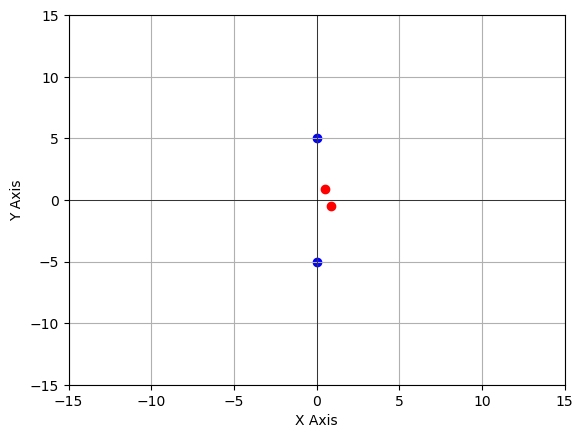

In [ ]:
cloud = 